In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error


In [3]:
# Create the dataset
data = {
    "Size (sqft)": [2000, 1500, 1800, 1200, 2500],
    "Bedrooms": [3, 2, 3, 2, 4],
    "Bathrooms": [2, 1, 2, 1, 3],
    "Location Score": [8, 7, 9, 6, 10],
    "Price ($)": [300000, 200000, 250000, 180000, 500000]
}

In [4]:
# Convert to DataFrame
df = pd.DataFrame(data)

In [5]:
# Separate features and target
X = df[["Size (sqft)", "Bedrooms", "Bathrooms", "Location Score"]]
y = df["Price ($)"]

In [6]:
# Add an interaction term: Size * Location Score
df["Size x Location"] = df["Size (sqft)"] * df["Location Score"]

In [7]:
# Updated feature set with interaction term

X_interaction  = df[["Size (sqft)",  "Bedrooms", "Bathrooms", "Location Score","Size x Location"]]

In [8]:
# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_interaction)

In [9]:
# Split the Dataset

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [10]:
# Train the model

model_scaled = LinearRegression()

model_scaled.fit(X_train_scaled, y_train)


LinearRegression()

In [11]:
# Predict and calculate MSE
y_pred_scaled = model_scaled.predict(X_test_scaled)

mse_scaled = mean_squared_error(y_test, y_pred_scaled)


In [12]:
# Display results
print("Model Coefficients (Scaled):", model_scaled.coef_)
print("Mean Squared Error (Scaled Data):", mse_scaled)

Model Coefficients (Scaled): [-2.66666667e+02  2.70000000e+05  2.70000000e+05 -1.03333333e+05]
Mean Squared Error (Scaled Data): 41344444444.41963


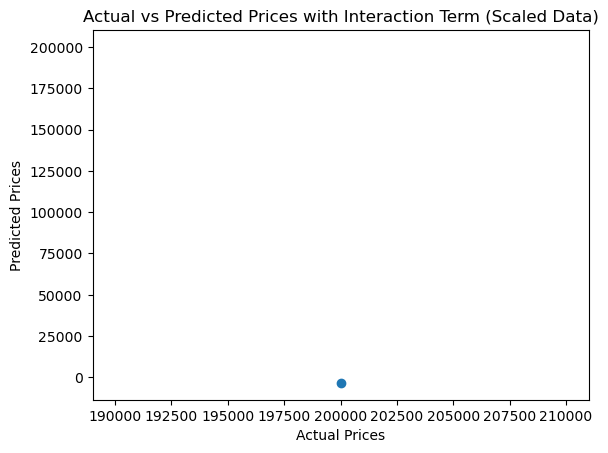

In [13]:
# Visualization
plt.scatter(y_test, y_pred_scaled)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices with Interaction Term (Scaled Data)")
plt.show()